indices:
 [[ 0  4  1  2 10  3  6  7  9  5]
 [ 1  0  4  7  3  2  9 10  6  5]
 [ 2  3  7  0  1  4 10  6  9  5]
 [ 3  2  7  1  0  4 10  6  9  5]
 [ 4  0  1 10  6  2  9  3  5  7]
 [ 5  9  6  8  4 10  0  1  2  3]
 [ 6 10  4  8  0  5  9  2  1  3]
 [ 7  3  2  1  0  4 10  9  6  5]
 [ 8  6  5 10  4  9  0  1  2  3]
 [ 9  5  4  0  1  6 10  7  2  8]
 [10  6  4  0  8  2  5  1  3  9]]
Voronoi-adjacent neighbors of point 0: [4, 1, 2, 10, 3, 7, 9, 5]
Position of point 0: [0.64414354 0.38074849]
11 11


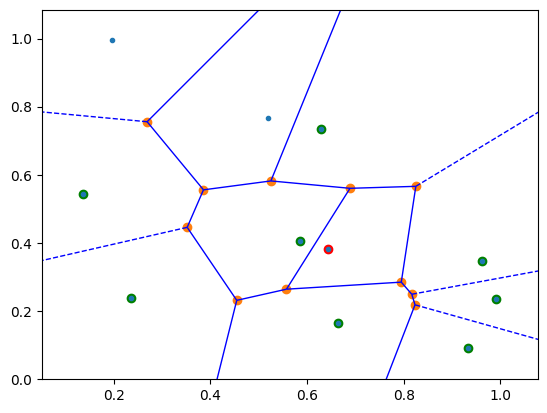

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import gradientUtils as gu

def distance_to_bisector(site1, site2, test_point):
    mid_point = (site1 + site2) / 2
    vec = site2 - site1
    vec_norm = np.linalg.norm(vec)
    
    # Check for zero-length vector (i.e., overlapping sites)
    if vec_norm < 1e-9:
        return np.inf  # Large value, indicating no valid bisector

    # Calculate the perpendicular vector
    perp_vec = np.array([-vec[1], vec[0]])  # Perpendicular vector
    perp_vec /= vec_norm  # Normalize the perpendicular vector
    return np.abs(np.dot(test_point - mid_point, perp_vec))

# Generate random Voronoi sites
np.random.seed(30)
points = np.random.rand(11, 2)  # 50 random points in 2D

# Compute KNN for each site (using k=10 as an example)
k = 10
knn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(points)
distances, indices = knn.kneighbors(points)
print('indices:\n',indices)
# Function to check if two sites are adjacent by the bisector method
def check_voronoi_adjacency(site1_idx, site2_idx, points):
    site1 = points[site1_idx]
    site2 = points[site2_idx]
    # Check if the minimum distance to the bisector is the same for both points
    for i, point in enumerate(points):
        if i != site1_idx and i != site2_idx:
            d1 = distance_to_bisector(site1, site2, points[site1_idx])
            d2 = distance_to_bisector(site1, site2, points[site2_idx])
            # If a point exists closer to the bisector, they are not adjacent
            if d1 != d2 or d1 > distances[site1_idx][1]:  # only nearest neighbor
                return False
    return True

# Iterate over each point and its K nearest neighbors, checking adjacency
adjacent_neighbors = []
for i, neighbors in enumerate(indices):
    valid_neighbors = []
    for neighbor_idx in neighbors:
        if check_voronoi_adjacency(i, neighbor_idx, points):
            valid_neighbors.append(neighbor_idx)
    adjacent_neighbors.append(valid_neighbors)

# Example: print neighbors of a specific point
print(f"Voronoi-adjacent neighbors of point 0: {adjacent_neighbors[0]}")
# position of point 0
print(f"Position of point 0: {points[0]}")

#len of points and len of adjacent_neighbors should be the same
print(len(points), len(adjacent_neighbors))

voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
# Plot the points
#plt.scatter(points[:, 0], points[:, 1], color='blue')
#change color of point 0
plt.scatter(points[0, 0], points[0, 1], color='red')
#scatter adjacent points
for i in adjacent_neighbors[0]:
    plt.scatter(points[i, 0], points[i, 1], color='green')

plt.show()


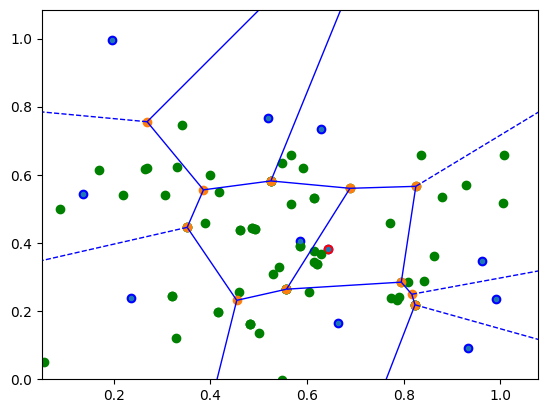

In [5]:
#append random values to a third column of points

points = np.append(points, np.random.uniform(-1, 1, (len(points), 1)), axis=1)
vertices = []



for p in range(len(points)):
    for i in range(len(adjacent_neighbors[p])):
        #if np.sign(points[p][2]) != np.sign(points[adjacent_neighbors[p][i]][2]):
        s_i = points[adjacent_neighbors[p][i],:2]
        s_j = points[p,:2]
        s_k = points[adjacent_neighbors[p][(i+1)%len(adjacent_neighbors[p])],:2]
        v = gu.compute_vertex(s_i, s_j, s_k)
        vertices.append(v)



voronoi_initial = Voronoi(points[:,:2])
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='blue')
#change color of point 0
plt.scatter(points[0, 0], points[0, 1], color='red')

#scatter the vertices
vertices = np.array(vertices)
plt.scatter(vertices[:, 0], vertices[:, 1], color='green')

plt.show()

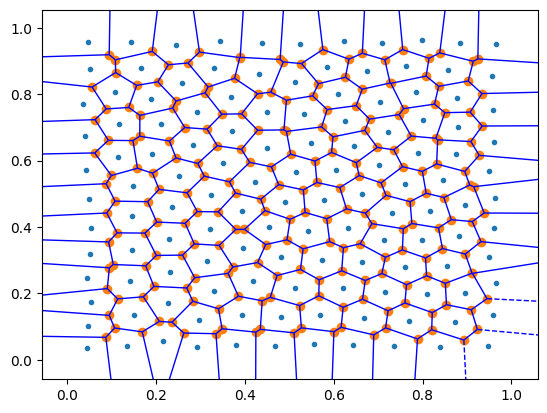

In [6]:
# Python code for creating a CVT
# Vassilis Vassiliades - Inria, Nancy - April 2018

import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans
import argparse

# Default values
num_centroids = 128
dimensionality = 2
num_samples = 100000
num_replicates = 1
max_iterations = 100
tolerance = 0.0001
verbose = True

X = np.random.rand(num_samples,dimensionality)

kmeans = KMeans(
    init='k-means++', 
    n_clusters=num_centroids, 
    n_init=num_replicates, 
    #n_jobs=-1, 
    max_iter=max_iterations, 
    tol=tolerance,
    verbose=0)

kmeans.fit(X)
centroids = kmeans.cluster_centers_
#print (centroids)

#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.scatter(centroids[:,0], centroids[:,1], s=3)
#plot voronoi of centroids
vor = Voronoi(centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
# Plot the points
plt.savefig('CVT_'f'{num_centroids}''.png',transparent=True)
plt.show()
